In [1]:
import numpy as np
import matplotlib.pylab as plt

### Taylor Expansion
The function is $$f(x)=x^2 \sin(x)$$ \
First and second derivatives are:
$$\frac{df}{dx} (x)=2x\sin(x)+x^2\cos(x)$$
$$\frac{d^2f}{dx^2} (x)=-(x^2)\sin(x)+4x\cos(x)+2\sin(x)$$
Assume you have the function and derivates' values at $x_0=2$. Approximate the function value at $x_1=2.1$, using the zeroth-, first-, and second-order Taylor Expansion.

In [2]:
## actual function: x^2*sin(x)
def F(x):
	return (x**2)*np.sin(x)

def dFdx(x):
	return 2.*x*np.sin(x)+(x**2)*np.cos(x)

def d2Fdx2(x):
	return -(x**2)*np.sin(x)+4.*x*np.cos(x)+2.*np.sin(x)

In [3]:
x0=2.
x1=2.1
dx=x1-x0

In [4]:
## exact value
print('exact value of F_1=',F(x1))

## 0th order approx
ans=F(x0)
print('0th order approximation of F_1=', ans )

## first order
ans=F(x0) + dFdx(x0)*dx
print('1st order approximation of F_1=', ans )

## second order
ans=F(x0) + dFdx(x0)*dx + d2Fdx2(x0)*(dx**2)/2.
print('2nd order approximation of F_1=', ans )

exact value of F_1= 3.806753306921533
0th order approximation of F_1= 3.637189707302727
1st order approximation of F_1= 3.8344499434141426
2nd order approximation of F_1= 3.808711095684


<details>
<summary>Answer</summary>

```python
## exact value
print('exact value of F_1=',F(x1))

## level 1
ans=F(x0)
print('level 1 approximation of F_1=', ans )

## first order
ans=F(x0)+dFdx(x0)*dx
print('level 2 approximation of F_1=', ans )

## second order
ans=F(x0)+dFdx(x0)*dx+d2Fdx2(x0)*(dx**2)/2.
print('level 3 approximation of F_1=', ans )
```
</details>

### First derivative, First order, Forward

In [16]:
## first derivative, first-order, forward
def dfdx_forward_o1(f,x):
    dx=x[1]-x[0]
    nx=len(x)
    
    #define the dfdx as an array with 1 point less than x
    dfdx=np.zeros((nx-1,),dtype=np.float64)
    
    # calculate the dfdx using forward first order method
    # 0 to nx-1 has nx-1 members!
    for i in range(0,nx-1):
        dfdx[i]=(f[i+1]-f[i])/dx
    return dfdx

<details>
<summary>Answer</summary>

```python
## first derivative, first-order, forward
def dfdx_forward_o1(f,x):
	dx=x[1]-x[0];
	nx=len(x)
	
	#define the dfdx as an array with 1 point less than x
	dfdx=np.zeros((nx-1,),dtype=np.float64)
	
	# calculate the dfdx using fiorward first order method
	# 0 to nx-1 has nx-1 members!
	for i in range(0,nx-1):
		dfdx[i]=(f[i+1]-f[i])/dx;
	
	return dfdx
```
</details>

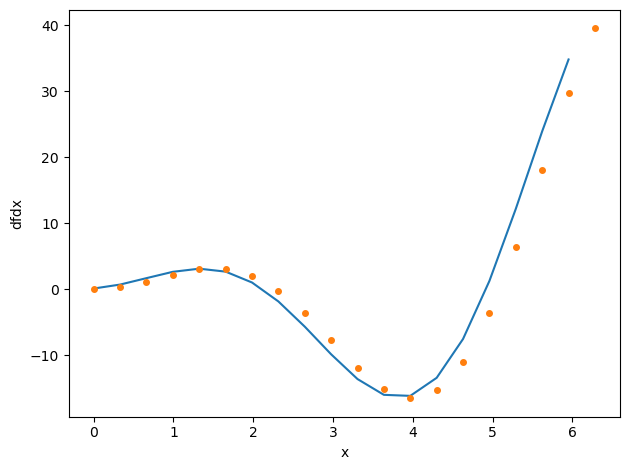

In [15]:
x=np.linspace(0,2*np.pi,20)
f=F(x)
dfdx_forward=dfdx_forward_o1(f,x)
dfdx_exact=dFdx(x)


fig, ax=plt.subplots(1,1)

# plot x vs dfdx_forward
ax.plot(x[:-1],dfdx_forward);

# plot x vs dfdx_exact
ax.plot(x,dfdx_exact,'o',ms=4);

ax.set_xlabel('x');
ax.set_ylabel('dfdx')
fig.tight_layout()

### First derivative, Second order, Central

In [23]:
## first derivative, second-order, central
def dfdx_central_o2(f,x):
    dx=x[1]-x[0]
    nx=len(x)
    
    #define the dfdx as an array with 2 point less than x
    dfdx=np.zeros((nx-2,),dtype=np.float64)
    
    # calculate the dfdx using fiorward first order method
    # 0 to nx-2 has nx-2 members!
    for i in range(1,nx-1):
        dfdx[i-1]=(f[i+1]-f[i-1])/(2*dx)
    
    return dfdx

<details>
<summary>Answer</summary>

```python
## first derivative, second-order, central
def dfdx_central_o2(f,x):
	dx=x[1]-x[0];
	nx=len(x)
	
	#define the dfdx as an array with 2 point less than x
	dfdx=np.zeros((nx-2,),dtype=np.float64)
	
	# calculate the dfdx using fiorward first order method
	# 0 to nx-2 has nx-2 members!
	for i in range(1,nx-1):
		dfdx[i-1]=(f[i+1]-f[i-1])/(2*dx);
	
	return dfdx
```
</details>

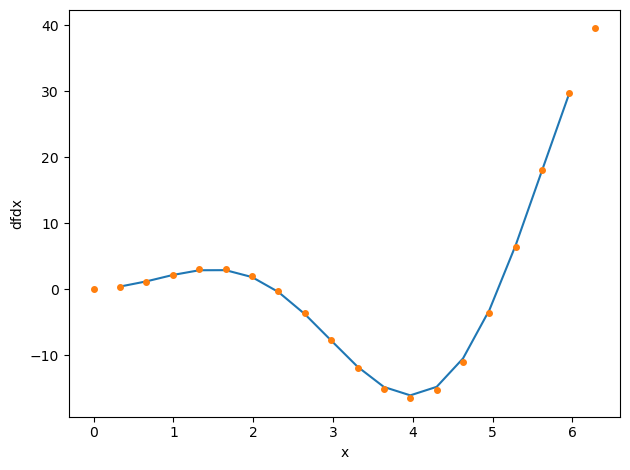

In [24]:
x=np.linspace(0,2*np.pi,20)
f=F(x)
dfdx_central=dfdx_central_o2(f,x)
dfdx_exact=dFdx(x)


fig, ax=plt.subplots(1,1)
#plot x vs dfdx_central
ax.plot(x[1:-1],dfdx_central);

# plot x vs dfdx_exact
ax.plot(x,dfdx_exact,'o',ms=4);

ax.set_xlabel('x');
ax.set_ylabel('dfdx')
fig.tight_layout()

### First derivative, Combined: second order central and first order at the boundaries

In [25]:
## first derivative
def dfdx_combined_o2(f,x):
	dx=x[1]-x[0];
	nx=len(x)
	
	#define the dfdx as an array with the same size as x
	dfdx=np.zeros((nx,),dtype=np.float64)
	
	for i in range(0,nx):
	    if i==0:
	    	dfdx[i]=(f[1]-f[0])/dx
	    elif i==nx-1:
	    	dfdx[i]=(f[nx-1]-f[nx-2])/dx
	    else:
	    	dfdx[i]=(f[i+1]-f[i-1])/(2*dx)
	return dfdx

<details>
<summary>Answer</summary>

```python
## first derivative
def dfdx_combined_o2(f,x):
	dx=x[1]-x[0];
	nx=len(x)
	
	#define the dfdx as an array with the same size as x
	dfdx=np.zeros((nx,),dtype=np.float64)
	
	for i in range(0,nx):
	    if i==0:
	    	dfdx[i]=(f[i+1]-f[i])/(dx);
	    elif i==nx-1:
	    	dfdx[i]=(f[i]-f[i-1])/(dx);
	    else:
	    	dfdx[i]=(f[i+1]-f[i-1])/(2*dx);
	return dfdx
```
</details>

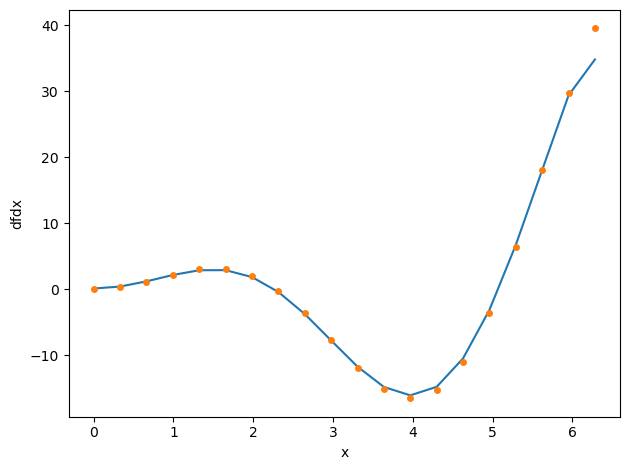

In [26]:
x=np.linspace(0,2*np.pi,20)
f=F(x)
dfdx_combined=dfdx_combined_o2(f,x)
dfdx_exact=dFdx(x)

fig, ax=plt.subplots(1,1)

# plot x vs dfdx_combined
ax.plot(x[:],dfdx_combined);

# plot x vs dfdx_exact
ax.plot(x,dfdx_exact,'o',ms=4);

ax.set_xlabel('x');
ax.set_ylabel('dfdx')
fig.tight_layout()

### Compare all three

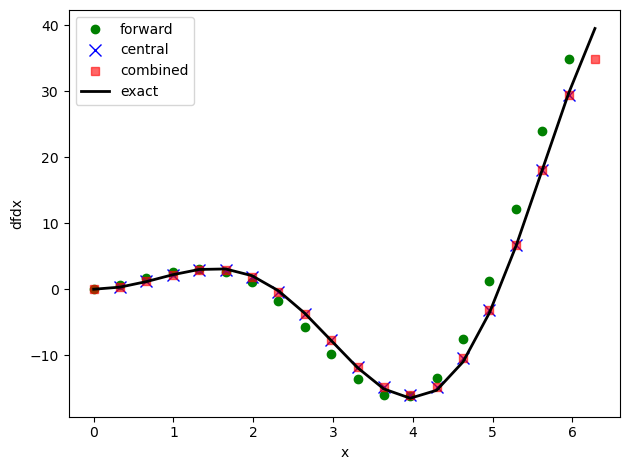

In [27]:
fig, ax=plt.subplots(1,1)

# plot x vs dfdx_forward
ax.plot(x[:-1],dfdx_forward,'o',color='green');
# plot x vs dfdx_central
ax.plot(x[1:-1],dfdx_central,'x',ms=8,color='blue');
# plot x vs dfdx_combined
ax.plot(x[:],dfdx_combined,'s',color='red',alpha=0.6);
# plot x vs dfdx_exact
ax.plot(x,dfdx_exact,lw=2,color='black');

ax.legend(['forward','central','combined','exact'],loc='best')

ax.set_xlabel('x');
ax.set_ylabel('dfdx')
fig.tight_layout()